# README Maker

- This notebook will combine all of the html lesson backups into 1 for the README.


### Caveats/Considerations:
- Do we really want all 3 versions of step 1 on the README?

# Code

In [1]:
import os,glob
import pandas as pd
import numpy as np
from IPython.display import display, HTML,Markdown

In [2]:
FOLDER = "../docs/"
OUTPUT_FILE = "README_lessons.html"
sorted(os.listdir(FOLDER))

['0 Installation Overview.html',
 '1 Downloading and Installing Required Apps.html',
 '1_1_mac_apple_chip.html',
 '1_1_mac_intel.html',
 '1_1_windows.html',
 '2.1_Clone_dojo-env-setup_repo.html',
 '2.2_open_the_repo.html',
 '2.3_create_dojo-env.html',
 '2.4_testing_the_env.html',
 '2.5_setting_the_default_env.html',
 '2.6_add_nbextensions.html',
 '2_Setting_Up_dojo-env.html',
 '3_install_code_editor.html',
 'Final Notes.html',
 'Updating_dojo_env.html']

In [3]:
html_files = sorted(glob.glob(FOLDER+"*.html"))
html_files

['../docs/0 Installation Overview.html',
 '../docs/1 Downloading and Installing Required Apps.html',
 '../docs/1_1_mac_apple_chip.html',
 '../docs/1_1_mac_intel.html',
 '../docs/1_1_windows.html',
 '../docs/2.1_Clone_dojo-env-setup_repo.html',
 '../docs/2.2_open_the_repo.html',
 '../docs/2.3_create_dojo-env.html',
 '../docs/2.4_testing_the_env.html',
 '../docs/2.5_setting_the_default_env.html',
 '../docs/2.6_add_nbextensions.html',
 '../docs/2_Setting_Up_dojo-env.html',
 '../docs/3_install_code_editor.html',
 '../docs/Final Notes.html',
 '../docs/Updating_dojo_env.html']

In [4]:
## append all html file contents to 1 list 
html_combined = ["""<!DOCTYPE html>
<html><body><h1>Installing Python Locally</h1>"""]
html_combined.append(f"<p><strong>If the images below are not visible:\
please clone repo and then open <a href='./admin/{OUTPUT_FILE}' target='_blank' rel='noopener noreferrer'>this file</a> in your web browser.</p></strong>")
# html_combined.append(f"">)

for file in html_files:
    
    name = os.path.basename(file).replace("_",' ').replace(".html","").title()
    with open(file) as f:
        content = f.read()
    
    html_combined.append(f"<hr></hr>")
    html_combined.append(content)
    
html_combined.append("</body></html>")
## join using horizontal line
final = "<br>".join(html_combined)

In [5]:
HTML(final)

Computer/OS Type,Environment File Name
Windows,environment_windows.yml
MacOS with an Intel Processor,environment_mac_intel.yml
"MacOS with an Apple Chip (m1, m1pro, m2,etc)",environment_mac_mchip.yml
Computer/OS Type,Environment File Name
Windows,environment_windows.yml
MacOS with an Intel Processor,environment_mac_intel.yml
"MacOS with an Apple Chip (m1, m1pro, m2,etc)",environment_mac_mchip.yml


In [6]:
## save as README.lessons
with open(OUTPUT_FILE,'w') as f:
    f.write(final)

# 2. Fixing AWS images [WIP]
- 07/08/22

In [7]:
with open(OUTPUT_FILE) as f:
    raw_html = f.read()

In [9]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(raw_html)

all_links = soup.find_all("img")
all_links

In [19]:
# test link
link = all_links[0]
link

<img height="268" src="https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1656714456__About this Mac -Intel.png" style="background-color: initial; width: 475px; height: 268px;" width="475"/>

In [24]:
link['src']#.attrs

'https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1656714456__About this Mac -Intel.png'

In [26]:
from copy import deepcopy,copy
new_html = copy(raw_html)

- Try to download the image and save it to images

In [39]:
## split name on dunder to get fname
split = link['src'].split('__')
fname = split[1].replace(' ','_')
fname

'About_this_Mac_-Intel.png'

In [40]:
## Make new folder in images for lp
img_folder = "../images/lp/"
os.makedirs(img_folder,exist_ok=True)

In [41]:
img_folder+fname

'../images/lp/About_this_Mac_-Intel.png'

In [47]:
import requests, urllib
resp = requests.get(link['src'])
fname = link['src'].split('__')[1].replace(' ','_')

new_fname = img_folder+fname
with open(new_fname, 'wb') as f:
    f.write(resp.content)
    
## replace link in new_html
new_html.replace(link['src'], new_fname)

'<!DOCTYPE html>\n<html><body><h1>Installing Python Locally</h1><br><p><strong>If the images below are not visible:please clone repo and then open <a href=\'./admin/README_lessons.html\' target=\'_blank\' rel=\'noopener noreferrer\'>this file</a> in your web browser.</p></strong><br><hr></hr><br><h1>Installation Overview</h1>\n<p></p>\n<p><strong>These steps should take&nbsp; ~30-90 minutes,</strong> depending on the speed of your machine and internet\n\tconnection.&nbsp;<br></p>\n<p>By the end of this chapter, you will:</p>\n<ol>\n\t<li>&nbsp;Install GitHub Desktop,</li>\n\t<li>&nbsp;Install Anaconda&nbsp;(Python).</li>\n\t<li>&nbsp;Create a special Python environment (dojo-env)</li>\n\t<li>Supercharge Jupyter Notebooks with Extensions</li>\n\t<li>&nbsp;Install Visual&nbsp;Studio&nbsp;Code.&nbsp;</li>\n</ol>\n<blockquote>Note: if you previously installed the dojo-env are upgrading to the new one, please see the "Updating to New\n\tdojo-env at the end of this chapter.</blockquote>\n<p>

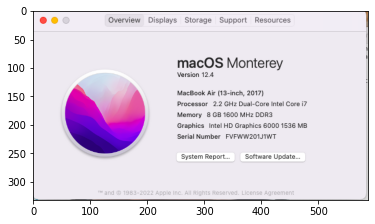

In [45]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(img_folder+fname))

In [53]:
soup = BeautifulSoup(raw_html)
all_links = soup.find_all("img")

## Make new_html to update
new_html = copy(raw_html)

In [57]:
## Loop through all images
for link in all_links:
    try:
        ## Get image
        resp = requests.get(link['src'])
        ## make new fname
        fname = link['src'].split('__')[1].replace(' ','_')
        new_fname = img_folder+fname

        ## save binary content (img) to disk
        with open(new_fname, 'wb') as f:
            f.write(resp.content)

        ## Replace original link in html with new file
        ## replace link in new_html
        new_html = new_html.replace(link['src'], new_fname)
    except Exception as e:
        print(f'[!] Error for img "{new_fname}":')
        print("    ",e)

[!] Error for img "../images/lp/turn_off_numbered_headers.png":
     list index out of range
[!] Error for img "../images/lp/turn_off_numbered_headers.png":
     list index out of range
[!] Error for img "../images/lp/turn_off_numbered_headers.png":
     list index out of range
[!] Error for img "../images/lp/turn_off_numbered_headers.png":
     list index out of range
[!] Error for img "../images/lp/turn_off_numbered_headers.png":
     list index out of range
[!] Error for img "../images/lp/turn_off_numbered_headers.png":
     list index out of range
[!] Error for img "../images/lp/turn_off_numbered_headers.png":
     list index out of range
[!] Error for img "../images/lp/turn_off_numbered_headers.png":
     list index out of range
[!] Error for img "../images/lp/turn_off_numbered_headers.png":
     list index out of range
[!] Error for img "../images/lp/turn_off_numbered_headers.png":
     list index out of range


In [58]:
HTML()

<IPython.core.display.HTML object>

In [59]:
with open ('Instructions.html','w') as f:
    f.write(new_html)

In [60]:
with open ("Instructions.html") as f:
    display(HTML(f.read()))

Computer/OS Type,Environment File Name
Windows,environment_windows.yml
MacOS with an Intel Processor,environment_mac_intel.yml
"MacOS with an Apple Chip (m1, m1pro, m2,etc)",environment_mac_mchip.yml
Computer/OS Type,Environment File Name
Windows,environment_windows.yml
MacOS with an Intel Processor,environment_mac_intel.yml
"MacOS with an Apple Chip (m1, m1pro, m2,etc)",environment_mac_mchip.yml
